# UniRef90 Invertebrate Analysis

##### The below analysis was conducted utilizing a filter to extract invertebrate hosts from the cleaned UniRef90 sequences and following the pre-processing steps. Through importing necessary libraries and using NCBI taxonomy database, plots were generated to visualize distributions of the invertebrate hosts and associated viruses.

### Installing dependencies and loading csv files

In [2]:
!pip install ete3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... one
  DEPRECATION: Building 'ete3' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'ete3'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for ete3: filename=ete3-3.1.3-py3-none-any.whl size=2273785 sha256=3958ed05466447e857b98c11cc3b74387e1ea8080f45d85bf6153ef18960b39b
  Stored in directory: /home/sarayup23/.cache/pip/wheels/dd/a8/60/0a29caa9f8ceb7316704be63c1578ab13c36668abb646366ac
Successfully built ete3


In [3]:
# import appropriate directories for analysis
import pandas as pd
import os
from ete3 import NCBITaxa
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from matplotlib.gridspec import GridSpec

file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90_viridae_embl_hosts_pruned_metadata_species_nonvertebrates_w_seq.csv")
df = pd.read_csv(file_path)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/projects/seqevol/sarayup23/HAVEN/src/jupyter_notebooks/datasets/analysis/../../../../input/data/uniref90_viridae_embl_hosts_pruned_metadata_species_nonvertebrates_w_seq.csv'

The below code reads in a csv file that merges the invertebrate host data with the full lineage ranks and tax IDs for further analysis.

In [ ]:
file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90_viridae_embl_hosts_pruned_metadata_species_nonvertebrates_w_seq_kingdom_class.csv")
kingdom_df = pd.read_csv(file_path)
kingdom_df.head()

### Host Distributions

#### Host Class Analysis

In [ ]:
ncbi = NCBITaxa()

# function to retrieve the kingdom and class from a taxid
def get_class(taxid):
    try:
        lineage = ncbi.get_lineage(taxid)
        names = ncbi.get_taxid_translator(lineage)
        ranks = ncbi.get_rank(lineage)

        clas = next((names[t] for t in lineage if ranks[t] == "class"), "Unknown")
        return pd.Series([clas])
    except:
        return pd.Series(["Unknown"])

# apply the function to the virus_host_tax_id column in the dataframe
df[['Class']] = df['virus_host_tax_id'].apply(get_class)

# filter classes by >=0.05%
class_counts = df['Class'].value_counts(normalize=True)
plot_class = class_counts[class_counts >= 0.004].index
df_class_filter = df[df['Class'].isin(plot_class)]

# plot class distribution pie chart
colors=sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(labels), reverse=True)
df_class_filter['Class'].value_counts().plot(kind='pie', colors=colors, wedgeprops={"linewidth": 1, "edgecolor": "white"}, autopct='%1.1f%%', title='Host Class Distribution', figsize=(10, 10))
plt.show()

In [4]:
# count frequencies of host classes
class_counts = df['Class'].value_counts()
class_counts = class_counts.drop('Unknown', errors='ignore')
total = class_counts.sum()

# define a threshold value and remove viruses that fall below
threshold = 0.01 # 1%
class_counts_filtered = class_counts[class_counts / total >= threshold]
other_count = class_counts[class_counts / total < threshold].sum()

# add data to a new column titled "Other"
if other_count > 0:
    class_counts_filtered['Other'] = other_count

# configure and plot the pie chart figure
colors = sns.cubehelix_palette(start=2, rot=-.4, gamma=.7, n_colors=len(class_counts_filtered), reverse=True)

class_counts_filtered.plot(
    kind='pie',
    figsize=(13, 13),
    colors=colors,
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    autopct='%1.1f%%',
    ylabel='',
    legend=False)
plt.title("Invertebrate Hosts Class Distribution")

NameError: name 'df' is not defined

In [33]:
# list of host classes below 0.05% prevalence in the dataset
class_counts = df['Class'].value_counts(normalize=True)
classes_below_threshold = class_counts[class_counts < 0.0005]
print("\nClasses below 0.05%:")
print(classes_below_threshold.apply(lambda x: f"{x*100:.4f}%"))


Classes below 0.05%:
Bacillariophyceae             0.0497%
Anthozoa                      0.0472%
Coscinodiscophyceae           0.0435%
Verrucomicrobiia              0.0422%
Ginkgoopsida                  0.0422%
Clitellata                    0.0410%
Holothuroidea                 0.0360%
Chromadorea                   0.0310%
Ulvophyceae                   0.0236%
Pezizomycetes                 0.0224%
Pinopsida                     0.0211%
Leptocardii                   0.0186%
Desulfuromonadia              0.0186%
Cestoda                       0.0186%
Mollicutes                    0.0174%
Glomeromycetes                0.0161%
Mucoromycetes                 0.0161%
Hexanauplia                   0.0149%
Entomophthoromycetes          0.0149%
Phaeophyceae                  0.0137%
Erysipelotrichia              0.0112%
Ichthyosporea                 0.0099%
Florideophyceae               0.0087%
Enoplea                       0.0087%
Echinoidea                    0.0087%
Tentaculata                 

In [6]:
# define functions for extrapolating data to configure pie charts and getting labels given a threshold
def get_data_for_pie_chart(df, col_name, n, threshold):
    count_data = df[col_name].value_counts().to_dict()

    label_data = {}
    prevalence_data = {}
    for k, v in count_data.items():
        prevalence = v/n*100
        prevalence_data[k] = f"{k} ({prevalence:.2f}%)"
        if prevalence <= threshold:
            prevalence_data[k] = f"{k} ({prevalence:.3f}%)"
            label_data[k] = ""
        else:
            label_data[k] = k
    return count_data, label_data, prevalence_data

def get_label(pct, threshold):
    if pct <= threshold:
        return ""
    else:
        return f"{pct:.2f}%"

In [7]:
# apply above function for the host classes
class_count_data, class_label_data, class_prevalence_data = get_data_for_pie_chart(kingdom_df, "class", kingdom_df.shape[0], threshold=0.5)

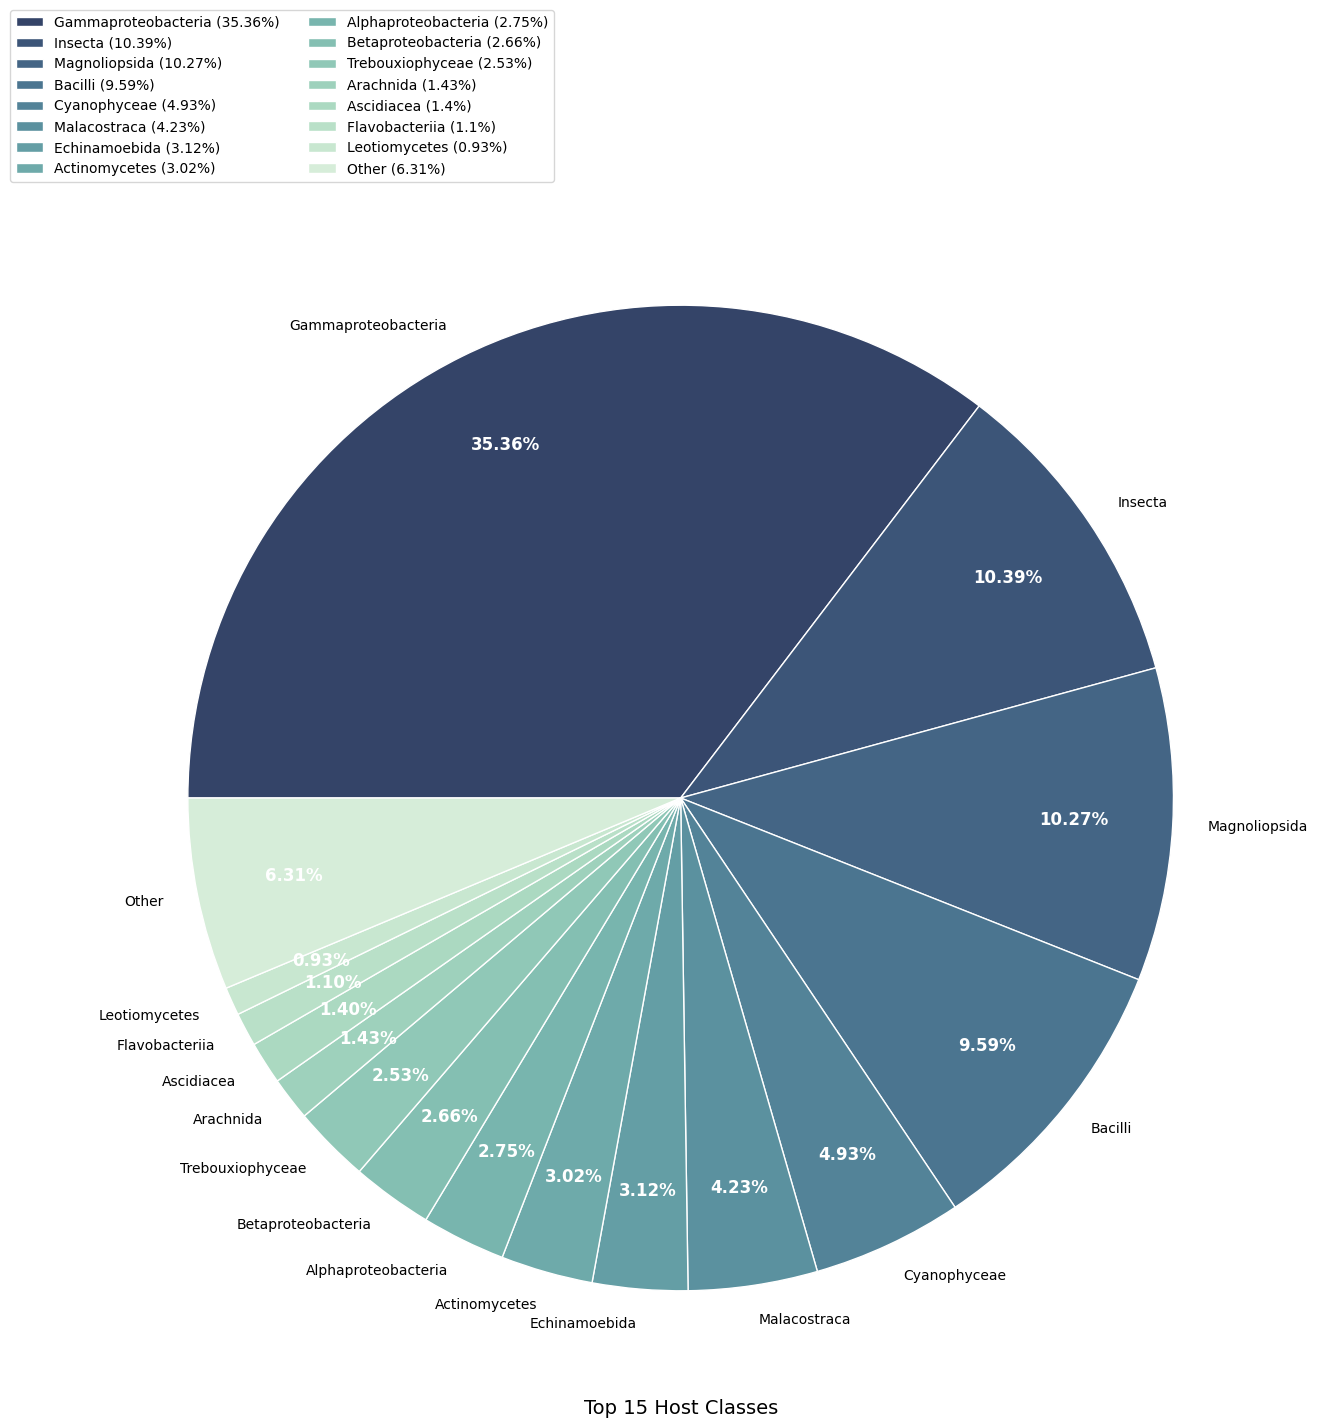

In [8]:
# sort host class counts in descending order
sort_counts = sorted(class_count_data.items(), key=lambda x: x[1], reverse=True)

# retrieve the top 15 host class counts
top_15 = dict(sort_counts[:15])

# calculate the sum of the host class counts not belonging to the top 15
other_sum = sum(count for _, count in sort_counts[15:])
top_15["Other"] = other_sum

# assign labels and counts for the top 15 host class counts
labels = list(top_15.keys())
counts = list(top_15.values())
percentages = np.round((counts / kingdom_df['class'].count()) * 100, decimals=2)
formatted_values = [f"{percent}%" for percent in percentages]

# configure and plot the pie chart
fig, ax = plt.subplots(figsize=(16, 16))
threshold = 0.5

wedges, texts, autotexts = ax.pie(
    counts,
    labels=labels,
    autopct=lambda pct: get_label(pct, threshold),
    pctdistance=0.8,
    startangle=-180,
    labeldistance=1.07,
    counterclock=False,
    colors=sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(labels), reverse=True),
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

# generate a legend to display the top 15 host classes and other category
combined_labels = [f"{label} ({value})" for label, value in zip(labels, formatted_values)]
ax.legend(wedges, combined_labels, title="", loc="center left", bbox_to_anchor=(-.05, 1.07), ncol=2)
plt.setp(autotexts, size=12, weight="bold", color="white")
ax.set_title("Top 15 Host Classes", fontsize=14, y=0, pad=0)
plt.show()


In [9]:
kingdom_count_data, kingdom_label_data, kingdom_prevalence_data = get_data_for_pie_chart(kingdom_df, "kingdom", kingdom_df.shape[0], threshold=0.5)

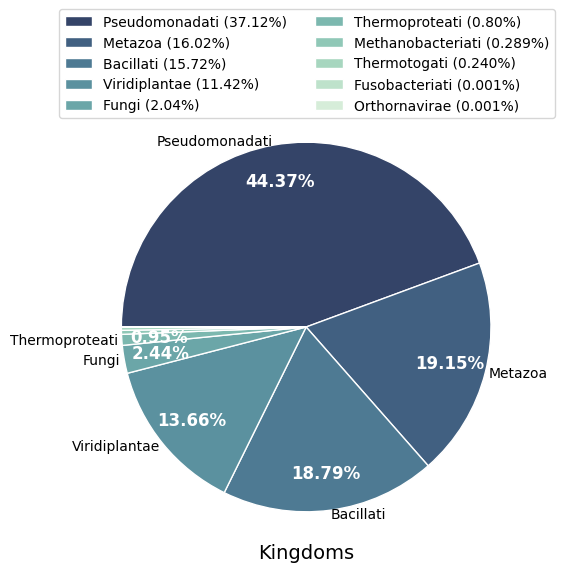

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))

threshold=0.5
wedges, texts, autotexts = ax.pie(kingdom_count_data.values(), labels=list(kingdom_label_data.values()), autopct=lambda pct: get_label(pct, threshold), 
                                  pctdistance=.8, startangle=-180, labeldistance=1.02, counterclock=False,
                                  colors=sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(kingdom_label_data), reverse=True), 
                                  wedgeprops={"linewidth": 1, "edgecolor": "white"})

ax.legend(wedges, kingdom_prevalence_data.values(),
          title="",
          loc="center left",
          bbox_to_anchor=(-.05, 1.07), ncol=2)
plt.setp(autotexts, size=12, weight="bold", color="white")
ax.set_title("Kingdoms", fontsize=14, y=0, pad=0)
plt.show()

### Kingdom-Level Host Composition with Class Subdivision

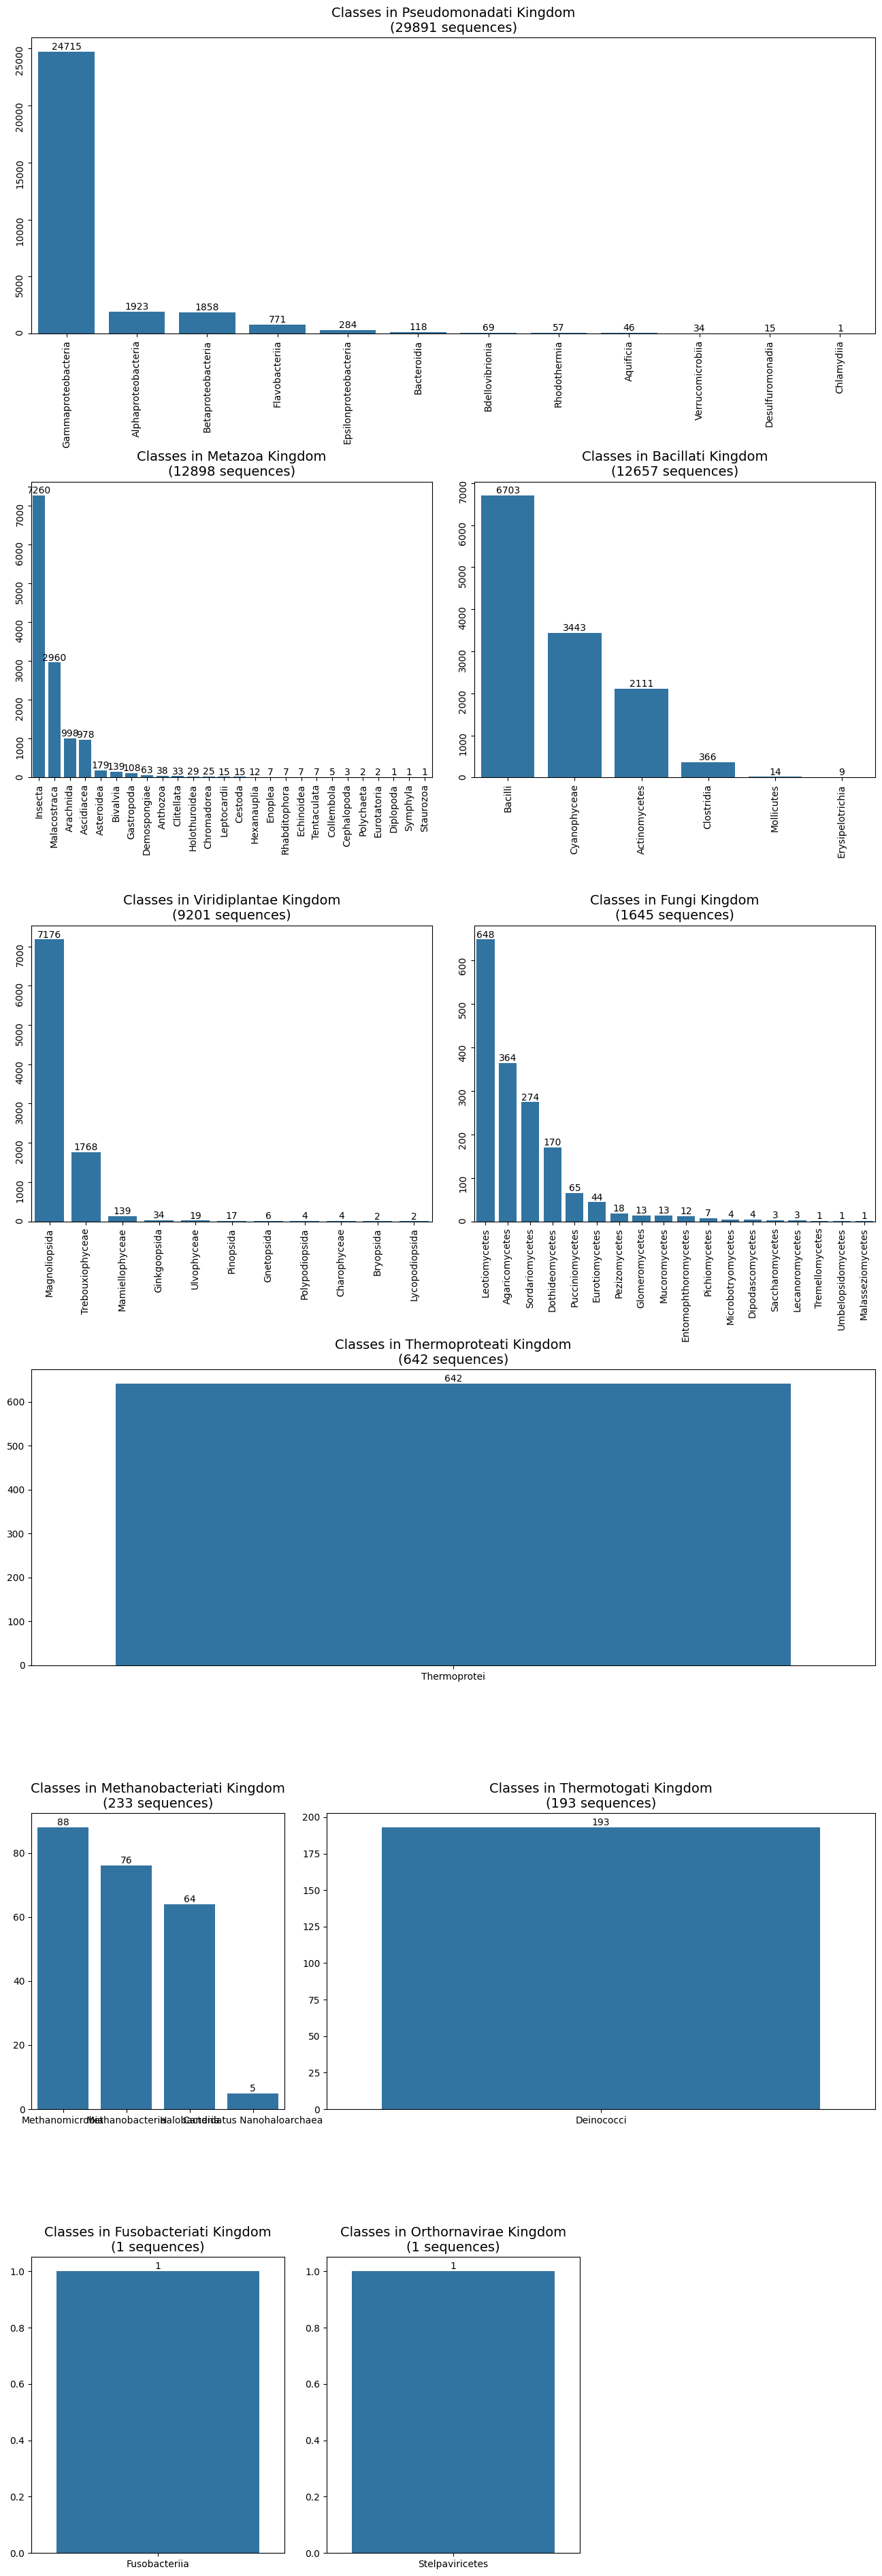

In [11]:
fig = plt.figure(figsize=(16,48))

gs = GridSpec(6, 6, wspace=.4,  hspace=.5)
kingdoms = list(kingdom_df["kingdom"].unique())
n_kingdoms = len(kingdoms)

axs = []
axs.append(fig.add_subplot(gs[0, :]))
axs.append(fig.add_subplot(gs[1, 0:3]))
axs.append(fig.add_subplot(gs[1, 3:]))
axs.append(fig.add_subplot(gs[2, 0:3]))
axs.append(fig.add_subplot(gs[2, 3:]))
axs.append(fig.add_subplot(gs[3, :]))
axs.append(fig.add_subplot(gs[4, 0:2]))
axs.append(fig.add_subplot(gs[4, 2:]))
axs.append(fig.add_subplot(gs[5, 0:2]))
axs.append(fig.add_subplot(gs[5, 2:4]))
#axs.append(fig.add_subplot(gs[5, 4:]))

i = 0
for kingdom, kingdom_count in kingdom_count_data.items():
    if i == n_kingdoms:
        break
    ax = axs[i]
    
    kingdom_data = kingdom_df[kingdom_df["kingdom"] == kingdom]
    n_kingdom = kingdom_data.shape[0]

    count_data, _, _ = get_data_for_pie_chart(kingdom_data, "class", n_kingdom, threshold=1.0)
    
    sns.barplot(count_data, ax=ax)
    ax.bar_label(ax.containers[0], fontsize=10);
    ax.set_title(f"Classes in {kingdom} Kingdom\n({kingdom_count} sequences)", fontsize=14)
    ax.set_ylabel("", fontsize=0)

    if len(count_data) > 4:
        ax.tick_params(labelrotation=90)
    i += 1

plt.show()

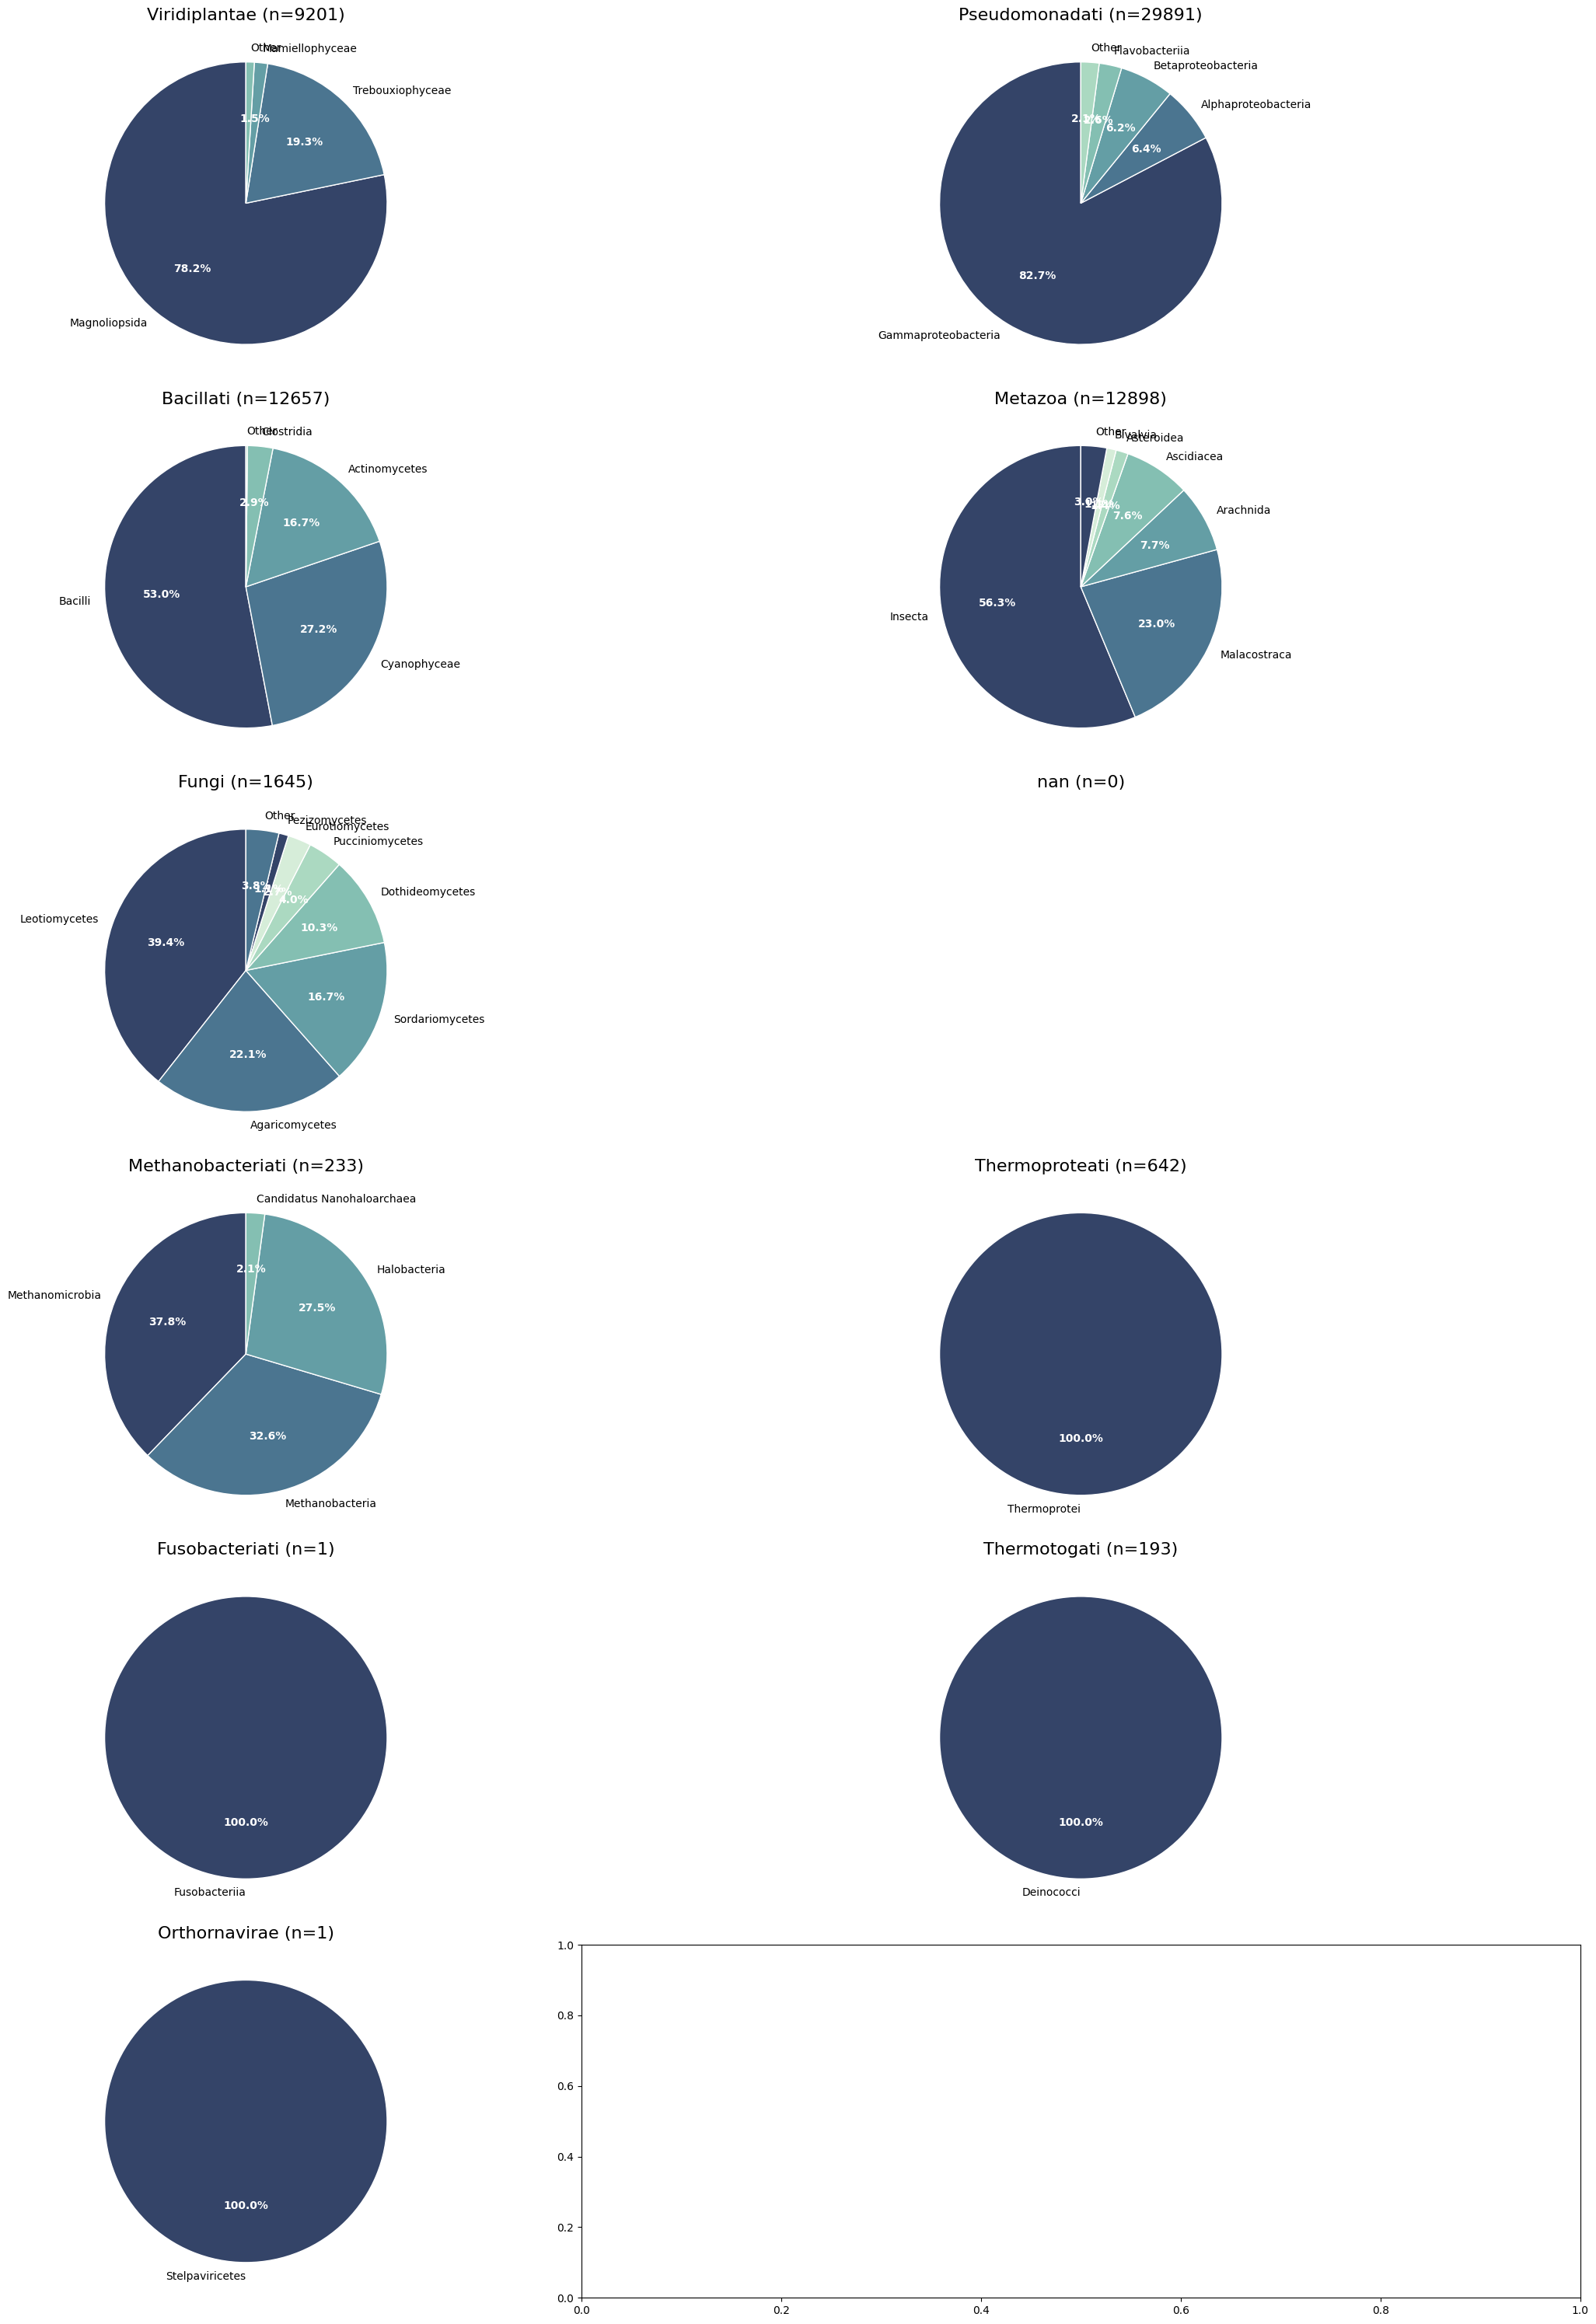

In [12]:
# determine the number of unique kingdoms
unique_kingdoms = kingdom_df["kingdom"].unique()
n_kingdoms = len(unique_kingdoms)

# set up grid for pie charts
ncols = 2
nrows = (n_kingdoms + ncols - 1) // ncols
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24, nrows * 5))
axs = axs.flatten()

# loop through each kingdom and plot each of the classes within
for i, kingdom in enumerate(unique_kingdoms):
    ax = axs[i]
    
    sub_df = kingdom_df[kingdom_df["kingdom"] == kingdom]
    total = sub_df.shape[0]
    
    # count host class occurrences
    class_counts = sub_df["class"].value_counts()
    class_prevalence = (class_counts / total) * 100

    # create major and minor class categories, where major classes exceed and include the threshold
    # generate an "Other" category for minor class labels
    threshold = 1.0  # percent
    major_classes = class_prevalence[class_prevalence >= threshold]
    minor_classes = class_prevalence[class_prevalence < threshold]
    
    class_labels = list(major_classes.index)
    class_sizes = list(major_classes.values)
    
    if not minor_classes.empty:
        class_labels.append("Other")
        class_sizes.append(minor_classes.sum())

    # configure pie chart and fill in with filtered data
    wedges, texts, autotexts = ax.pie(
        class_sizes,
        labels=class_labels,
        autopct=lambda pct: f"{pct:.1f}%" if pct >= threshold else '',
        startangle=90,
        colors=sns.cubehelix_palette(rot=-.4, gamma=.7, reverse=True,), 
                                  wedgeprops={"linewidth": 1, "edgecolor": "white"}
    )
    
    ax.set_title(f"{kingdom} (n={total})", fontsize=16)
    plt.setp(autotexts, size=10, weight="bold", color="white")

plt.tight_layout()
plt.show()

### Viral Protein Sequence Length

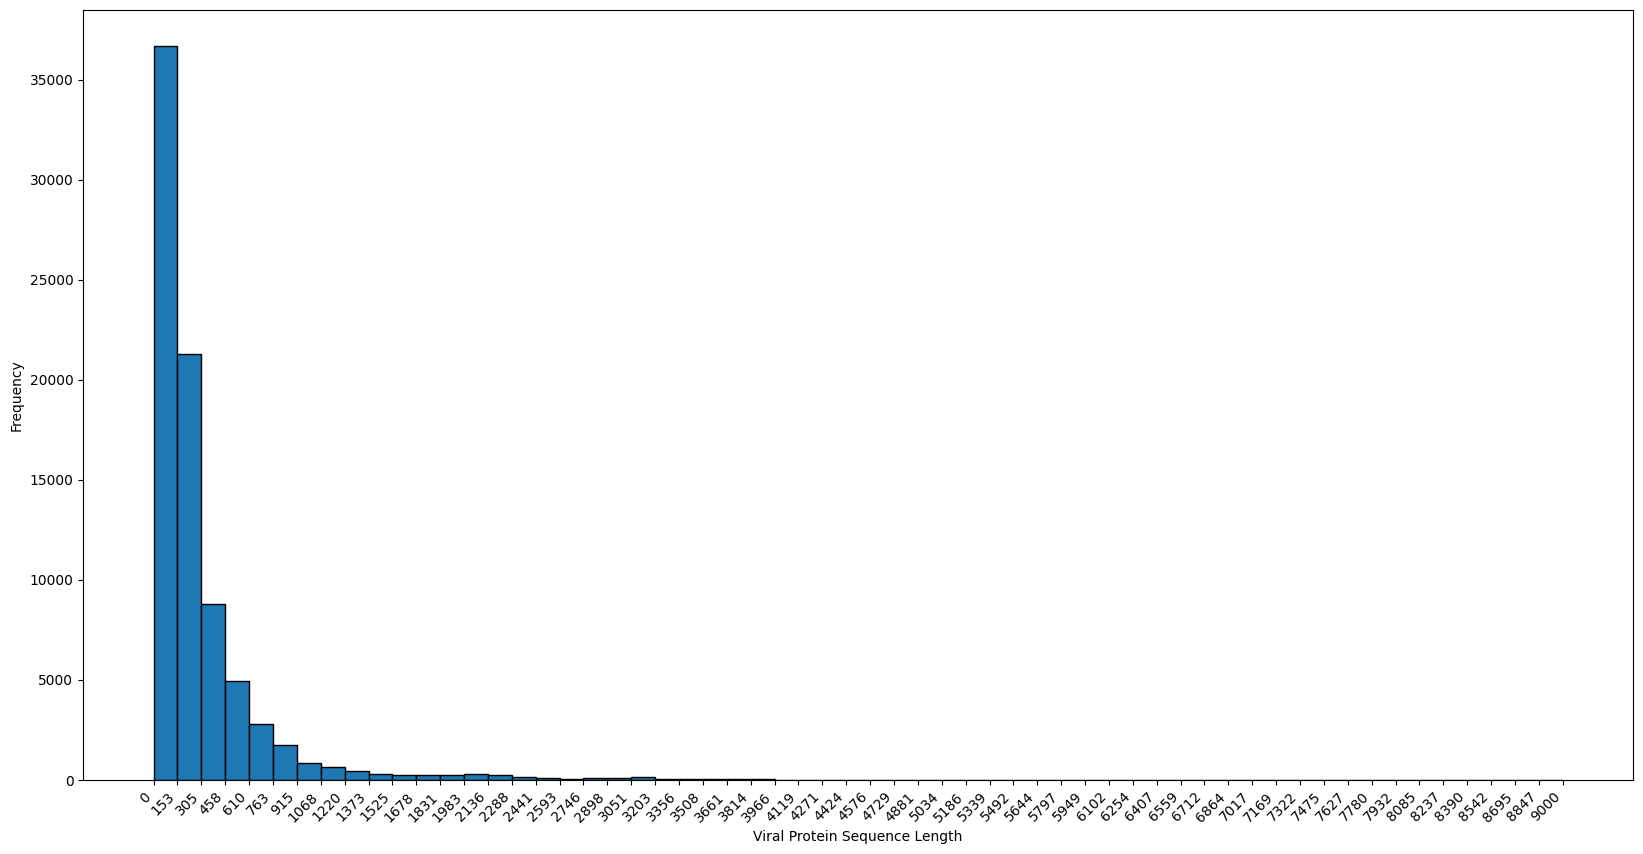

In [13]:
# determine the length of each viral protein sequence using a list comprehension
# plot a histogram given equally spaced intervals
seq_len = [len(seq) for seq in kingdom_df['seq']]
bins = np.linspace(0, 9000, 60)
plt.figure(figsize=(20, 10))
plt.hist(seq_len, bins=bins, edgecolor='black')
plt.xlabel('Viral Protein Sequence Length')
plt.ylabel('Frequency')
plt.xticks(bins, ha='right', rotation=45)
plt.show()

### Virus Composition

In [14]:
ncbi = NCBITaxa()

def get_virus_info(taxid):
    name = ncbi.get_taxid_translator([int(taxid)]).get(int(taxid), 'Unknown')
    lineage = ncbi.get_lineage(int(taxid))
    names = ncbi.get_taxid_translator(lineage)
    ranks = ncbi.get_rank(lineage)

    species = ''
    genus = ''
    family = ''

    try:
        for tid in lineage:
            rank = ranks.get(tid, '')
            name = names.get(tid, '')
            if rank == 'species':
                species = name
            elif rank == 'genus':
                genus = name
            elif rank == 'family':
                family = name
            elif rank == 'order':
                order = name
        return pd.Series([species if species else 'Unknown', genus if genus else 'Unknown', family if family else 'Unknown', order if order else 'Unknown'])
    except:
        return pd.Series(['Unknown', 'Unknown', 'Unknown', 'Unknown'])

df[['virus_species', 'virus_genus', 'virus_family', 'virus_order']] = df['tax_id'].apply(get_virus_info)

/Users/mallibalasarayutanmaypulipati/anaconda3/envs/virprobert/lib/python3.11/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:243: UserWarning: taxid 2761539 was translated into 1480731
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))
/Users/mallibalasarayutanmaypulipati/anaconda3/envs/virprobert/lib/python3.11/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:243: UserWarning: taxid 2231706 was translated into 3071284
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))
/Users/mallibalasarayutanmaypulipati/anaconda3/envs/virprobert/lib/python3.11/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:243: UserWarning: taxid 2231708 was translated into 3071285
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))


<Axes: ylabel='virus_order'>

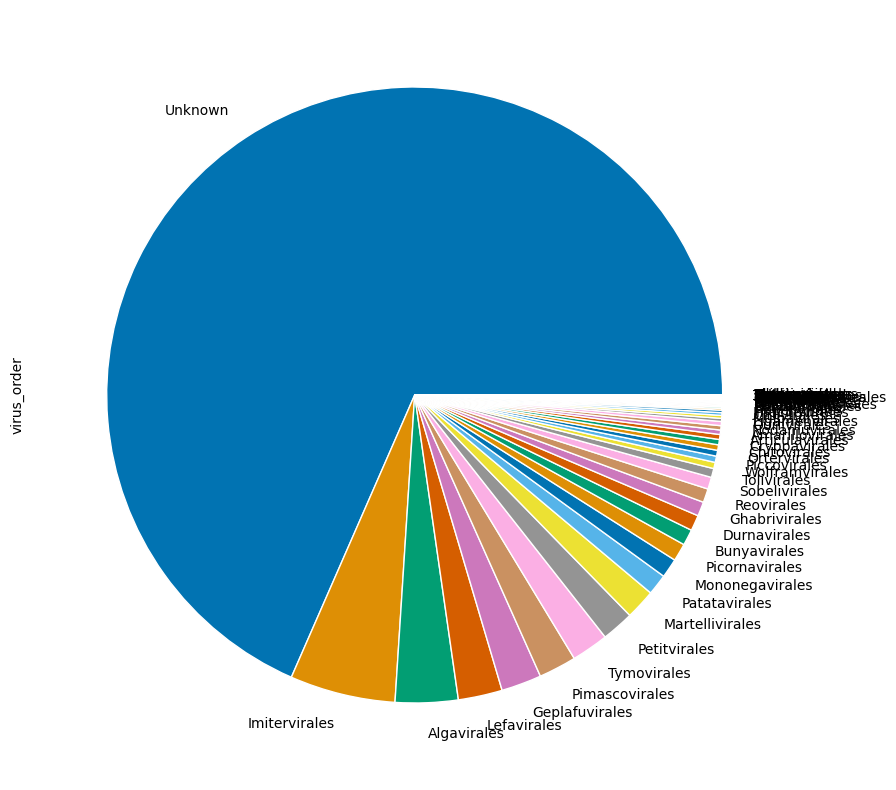

In [15]:
colors = sns.color_palette("colorblind")
df['virus_order'].value_counts().plot(kind='pie', figsize=(10, 10), colors=colors, wedgeprops={"linewidth": 1, "edgecolor": "white"})

<Axes: ylabel='virus_family'>

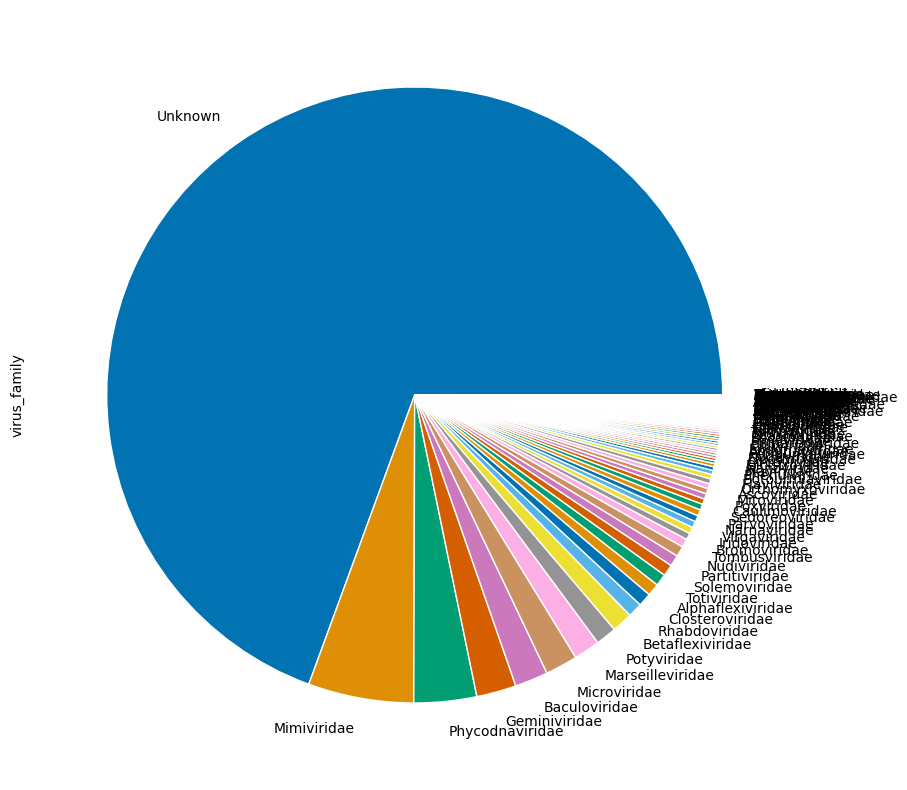

In [16]:
colors = sns.color_palette("colorblind")
df['virus_family'].value_counts().plot(kind='pie', figsize=(10, 10), colors=colors, wedgeprops={"linewidth": 1, "edgecolor": "white"})

<Axes: title={'center': 'Top 20 Virus Strain Groups'}, ylabel='strain_group_filtered'>

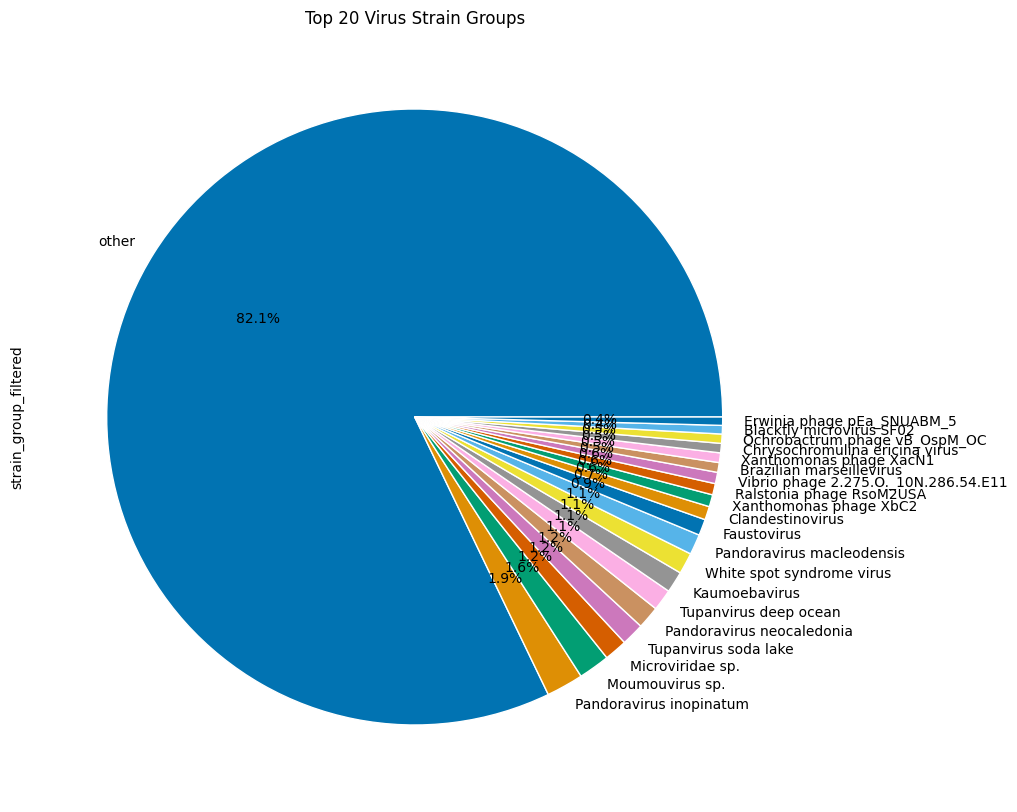

In [18]:
# get the top 20 most frequent strains that infect invertebrates
top_20 = 20
top_groups = df['virus_name'].value_counts().nlargest(top_20).index

# categorize all other strains into "other" category
df['strain_group_filtered'] = df['virus_name'].apply(lambda x: x if x in top_groups else 'other')

# initialize a color palette
colors = sns.color_palette("colorblind")

# configure and plot pie chart
df['strain_group_filtered'].value_counts().plot(
    kind='pie',
    labeldistance=1.07,
    autopct='%1.1f%%',
    title='Top 20 Virus Strain Groups',
    figsize=(10, 10), colors=colors, wedgeprops={"linewidth": 1, "edgecolor": "white"})

### Virus Host Counts

In [19]:
n = kingdom_df.shape[0]
host_count_data, host_label_data, host_prevalence_data = get_data_for_pie_chart(kingdom_df, col_name="virus_host_name", n=n, threshold=.01)
others_hosts = []
for k,v in host_count_data.items():
    if (v/n*100) <= 1.5:
        others_hosts.append(k)
        
kingdom_df["virus_host_name_mod"] = kingdom_df["virus_host_name"].apply(lambda x: x if x not in others_hosts else f"Others ({len(others_hosts)} hosts)")

host_count_data, host_label_data, host_prevalence_data = get_data_for_pie_chart(kingdom_df[~kingdom_df["virus_host_name"].isin(others_hosts)], col_name="virus_host_name_mod", n=n, threshold=0.01)

In [20]:
host_prevalence_data

{'Acanthamoeba sp.': 'Acanthamoeba sp. (7.13%)',
 'Acanthamoeba polyphaga': 'Acanthamoeba polyphaga (2.97%)',
 'Vermamoeba vermiformis': 'Vermamoeba vermiformis (2.68%)',
 'Escherichia coli': 'Escherichia coli (2.32%)',
 'Aeromonas hydrophila': 'Aeromonas hydrophila (1.80%)',
 'Acanthamoeba castellanii': 'Acanthamoeba castellanii (1.76%)'}

In [21]:
n_others = df[df['virus_host_name'].isin(others_hosts)].shape[0]
host_prevalence_data["Hosts with prevalence <= 1.5%"] = f"Hosts with prevalence <= 0.15%\n{len(others_hosts)} hosts ({n_others/n*100:.2f}%)"

In [22]:
host_prevalence_data

{'Acanthamoeba sp.': 'Acanthamoeba sp. (7.13%)',
 'Acanthamoeba polyphaga': 'Acanthamoeba polyphaga (2.97%)',
 'Vermamoeba vermiformis': 'Vermamoeba vermiformis (2.68%)',
 'Escherichia coli': 'Escherichia coli (2.32%)',
 'Aeromonas hydrophila': 'Aeromonas hydrophila (1.80%)',
 'Acanthamoeba castellanii': 'Acanthamoeba castellanii (1.76%)',
 'Hosts with prevalence <= 1.5%': 'Hosts with prevalence <= 0.15%\n2342 hosts (81.34%)'}

In [23]:
host_count_data

{'Acanthamoeba sp.': 5746,
 'Acanthamoeba polyphaga': 2395,
 'Vermamoeba vermiformis': 2160,
 'Escherichia coli': 1865,
 'Aeromonas hydrophila': 1451,
 'Acanthamoeba castellanii': 1415}

In [24]:
host_count_data["Hosts with prevalence <= 1%"] = n_others
host_count_data

{'Acanthamoeba sp.': 5746,
 'Acanthamoeba polyphaga': 2395,
 'Vermamoeba vermiformis': 2160,
 'Escherichia coli': 1865,
 'Aeromonas hydrophila': 1451,
 'Acanthamoeba castellanii': 1415,
 'Hosts with prevalence <= 1%': 65504}

100.0


NameError: name 'prevalence_data' is not defined

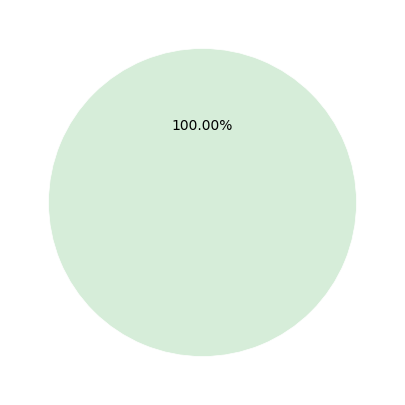

In [25]:
fig, ax = plt.subplots(figsize=(9, 5))

def get_label(pct, threshold):
    print(pct)
    if pct <= threshold:
        return ""
    else:
        return f"{pct:.2f}%"

threshold=1.0
wedges, texts, autotexts = ax.pie(count_data.values(), autopct=lambda pct: get_label(pct, threshold=3), 
                                  pctdistance=.5, labeldistance=.7, counterclock=False, startangle=-90,
                                  colors=sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(count_data), reverse=True), 
                                  wedgeprops={"linewidth": .5, "edgecolor": "white"})

ax.legend(wedges, prevalence_data.values(),
          title="",
          loc="center",
          bbox_to_anchor=(1.35, .6), ncol=1)
plt.setp(autotexts, size=12, color="black")
plt.setp(autotexts[0], size=12, color="white")
plt.setp(autotexts[-1], size=12, color="black")
#ax.set_title("IV Dataset", fontsize=14, y=0, pad=0)
#plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", "output/visualization/temp_new/noniv_hosts_pie.pdf"), bbox_inches="tight", dpi=600)
plt.show()

### Virus Counts

In [26]:
vir_count_data, vir_label_data, vir_prevalence_data = get_data_for_pie_chart(kingdom_df, col_name="virus_name", n=n, threshold=0.01)
other_viruses = []
for k,v in vir_count_data.items():
    if(v/n*100) <= 0.5:
        other_viruses.append(k)

kingdom_df["virus_name_mod"] = kingdom_df["virus_name"].apply(lambda x: x if x not in other_viruses else f"Others ({len(other_viruses)} viruses)")
vir_count_data, vir_label_data, vir_prevalence_data = get_data_for_pie_chart(kingdom_df[~kingdom_df["virus_name"].isin(other_viruses)], col_name="virus_name_mod", n=n, threshold=0.01)

In [27]:
vir_prevalence_data

{'Pandoravirus inopinatum': 'Pandoravirus inopinatum (1.94%)',
 'Moumouvirus sp.': 'Moumouvirus sp. (1.64%)',
 'Microviridae sp.': 'Microviridae sp. (1.20%)',
 'Tupanvirus soda lake': 'Tupanvirus soda lake (1.19%)',
 'Pandoravirus neocaledonia': 'Pandoravirus neocaledonia (1.19%)',
 'Tupanvirus deep ocean': 'Tupanvirus deep ocean (1.12%)',
 'Kaumoebavirus': 'Kaumoebavirus (1.12%)',
 'White spot syndrome virus': 'White spot syndrome virus (1.12%)',
 'Pandoravirus macleodensis': 'Pandoravirus macleodensis (1.07%)',
 'Faustovirus': 'Faustovirus (0.85%)',
 'Clandestinovirus': 'Clandestinovirus (0.71%)',
 'Xanthomonas phage XbC2': 'Xanthomonas phage XbC2 (0.63%)',
 'Ralstonia phage RsoM2USA': 'Ralstonia phage RsoM2USA (0.59%)',
 'Vibrio phage 2.275.O._10N.286.54.E11': 'Vibrio phage 2.275.O._10N.286.54.E11 (0.59%)',
 'Brazilian marseillevirus': 'Brazilian marseillevirus (0.51%)',
 'Xanthomonas phage XacN1': 'Xanthomonas phage XacN1 (0.51%)'}

In [28]:
vir_count_data.pop("Pandoravirus inopinatum")

1563

In [29]:
vir_count_data

{'Moumouvirus sp.': 1322,
 'Microviridae sp.': 970,
 'Tupanvirus soda lake': 961,
 'Pandoravirus neocaledonia': 958,
 'Tupanvirus deep ocean': 906,
 'Kaumoebavirus': 902,
 'White spot syndrome virus': 899,
 'Pandoravirus macleodensis': 862,
 'Faustovirus': 685,
 'Clandestinovirus': 569,
 'Xanthomonas phage XbC2': 510,
 'Ralstonia phage RsoM2USA': 479,
 'Vibrio phage 2.275.O._10N.286.54.E11': 478,
 'Brazilian marseillevirus': 413,
 'Xanthomonas phage XacN1': 408}

11322
Moumouvirus sp. > 1322 > 0.11676382264617559
Microviridae sp. > 970 > 0.08567390920332096
Tupanvirus soda lake > 961 > 0.08487899664370252
Pandoravirus neocaledonia > 958 > 0.08461402579049637
Tupanvirus deep ocean > 906 > 0.0800211976682565
Kaumoebavirus > 902 > 0.07966790319731497
White spot syndrome virus > 899 > 0.07940293234410882
Pandoravirus macleodensis > 862 > 0.07613495848789967
Faustovirus > 685 > 0.06050167814873697
Clandestinovirus > 569 > 0.05025613849143261
Xanthomonas phage XbC2 > 510 > 0.04504504504504504
Ralstonia phage RsoM2USA > 479 > 0.042307012895248186
Vibrio phage 2.275.O._10N.286.54.E11 > 478 > 0.04221868927751281
Brazilian marseillevirus > 413 > 0.03647765412471295
Xanthomonas phage XacN1 > 408 > 0.036036036036036036


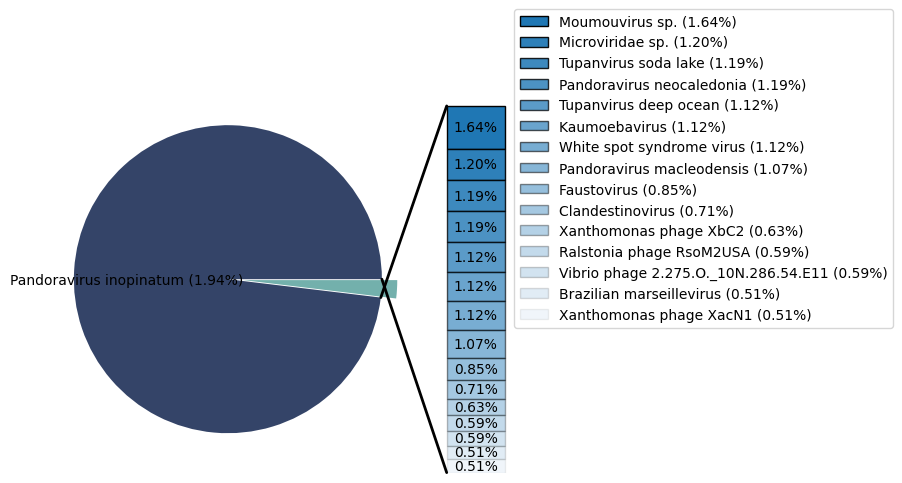

In [30]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=-.5)

# pie chart parameters
pie_values = [kingdom_df[kingdom_df['virus_name'] != ""].shape[0], df[df['virus_name'] == "Pandoravirus inopinatum"].shape[0]]
pie_labels = ['', vir_prevalence_data["Pandoravirus inopinatum"]]
explode = [0.1, 0]

# rotate so that first wedge is split by the x-axis
#angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(pie_values, startangle=0,
                     labels=pie_labels, explode=explode, 
                     labeldistance=0,
                     colors=sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(pie_labels)+1, reverse=True))

# bar chart parameters
bar_values = [i for i in reversed(vir_count_data.values())]
bar_labels = [i for i in reversed(vir_count_data.keys())]
bottom = 1
width = 10.1
bar_total = sum(bar_values)

print(bar_total)
# Adding from the top matches the legend.
for j, (val, label) in enumerate(reversed([*zip(bar_values, bar_labels)])):
    height = val / bar_total
    print(f"{label} > {val} > {height}")
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=vir_prevalence_data[label], edgecolor="black",
                 alpha=1-(1/len(bar_labels) * j))
    label_pct = val/n*100
    if label_pct > 0.01:
        ax2.bar_label(bc, labels=[f"{val/n*100:.2f}%"], label_type='center')

ax2.legend(loc="center",
          bbox_to_anchor=(.99, .79))
ax2.axis('off')
ax2.set_xlim(-4*width, 4*width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = 1

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)
#plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", "output/visualization/temp_new/iv_viruses_pie_bar.pdf"), bbox_inches="tight", dpi=600)
plt.show()

## Observations & Conclusions

We can see from the invertebrate host kingdom distribution pie chart that Kingdom Pseudomonadati encapsulates a little less than 50% of the invertebrate hosts. The class that encapsulates the largest portion of invertebrate hosts is Gammaproteobacteria which is housed within this kingdom. By the histogram showing the viral protein sequence lengths, we see that a majority, roughly 58000 sequences, are composed of 0 to 310 amino acids.

After writing a function to extract the taxonomy for the viruses that infect invertebrates, we observe that Mimiviridae (family) and Imitervirales (order) host the majority. Further, after filtering for the top 20 infecting viruses, we notice that vibrio and pandoravirus genus' encocmpass the majority.